# NLP Topic Modeling w/Enviro Policy Using Spacy Language Models


Using the paper *Beyond modeling: NLP Pipeline for efficient environmental policy analysis* [Planas et al.(2022)](https://arxiv.org/abs/2201.07105) by  and their recommended Knowledge Management Framework, I designed a NLP workflow with PythonGPT and Mistral to carry out Topic Modeling on a single page of the 2014 French National Agroecology policy **La loi d'avenir pour l'agriculture, l'alimentation et la forêt**

In [ ]:
#next steps: open a new notebook
#use python GPT to complete 'assignment'
#Graduate Level Assignment: Topic Modeling on Translated Sentences from PDF Using spaCy French Model

#Next feed Loi pdf to ChatGPT and see how it does with translation

In [2]:
#previously installed
#!pip install pymupdf 
#!pip install googletrans==4.0.0-rc1 
#!pip install nltk
#!pip install spacy

#!pip install gensim 
#!pip install pyLDAvis
#!pip install scikit-learn

### Pre-NLP: import libraries

In [9]:
#Step 1: Extract Text from PDF
import fitz  # PyMuPDF


#Step 3: Preprocess the French Sentences
import spacy
from nltk.tokenize import sent_tokenize

#Step 4: Translate the Sentences
from googletrans import Translator

#Step 5: Perform Topic Modeling
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#unsupervised topic modeling
#represents documents as semantic vectors
import gensim
from gensim import corpora

#Step 6
import pyLDAvis
import pyLDAvis.gensim_models

### Pre-NLP: Verify spacy install + Language Models

In [3]:
#above install of spacy threw conflict errors
#verifying proper install of spacy + language models

# Load the spaCy models
nlp_fr = spacy.load('fr_core_news_sm')
nlp_en = spacy.load('en_core_web_sm')

# Example French and English texts
french_text = "Bonjour tout le monde."
english_text = "Hello everyone."

# Process the texts
doc_fr = nlp_fr(french_text)
doc_en = nlp_en(english_text)

# Print tokens
print("French tokens:", [token.text for token in doc_fr])
print("English tokens:", [token.text for token in doc_en])

French tokens: ['Bonjour', 'tout', 'le', 'monde', '.']
English tokens: ['Hello', 'everyone', '.']


### Step 1: Extract Text from PDF

In [5]:
#Function to extract txt from pdf
#debugging steps: commented out

def pdf_to_text_third_page(pdf_path):
    # Open the PDF file
    doc = fitz.open(pdf_path)
    
    # Check the number of pages
    #if len(doc) < 3:
        #raise ValueError("The PDF does not contain a third page.")
    
    # Load the third page (page indexing in PyMuPDF starts @ 0)
    third_page = doc.load_page(2)
    
    # Extract text from the third page
    text = third_page.get_text()
    #if text is None:
        #raise ValueError("No text found on the third page.")
    
    return text

#La Loi
pdf_path = '/Users/jenniferbadger/Dropbox/AI_course/NLP project/joe_20141014_0238_0001.pdf'

# Step 1: Extract Text from PDF
try:
    third_page_text = pdf_to_text_third_page(pdf_path)
    print("Extracted Text from Third Page:\n", third_page_text)
except ValueError as e:
    print(e)
    third_page_text = ""

Extracted Text from Third Page:
 « V. – La politique en faveur de l’agriculture et de l’alimentation tient compte des spécificités des outre-mer 
ainsi que de l’ensemble des enjeux économiques, sociaux et environnementaux de ces territoires. Elle a pour 
objectif de favoriser le développement des productions agricoles d’outre-mer, en soutenant leur accès aux marchés, 
la recherche et l’innovation, l’organisation et la modernisation de l’agriculture par la structuration en filières 
organisées compétitives et durables, l’emploi, la satisfaction de la demande alimentaire locale par des productions 
locales, le développement des énergies renouvelables, des démarches de qualité particulières et de l’agriculture 
familiale, ainsi que de répondre aux spécificités de ces territoires en matière de santé des animaux et des végétaux. 
« VI. – La politique en faveur de l’agriculture et de l’alimentation tient compte des spécificités des territoires de 
montagne, en application de l’article 8 de l

### Step 2: Save the Extracted Text to a TXT File

In [10]:
# Function to save text to a file

def save_text_to_file(text, filename):
    #opens the file specified by filename in write mode 
    #with UTF-8 encoding
    with open(filename, 'w', encoding='utf-8') as file:
        #writes the text to the file
        #file is automatically closed when the block inside with is exited
        file.write(text)

# Save the extracted text to a file
#with if statement for debugging

if third_page_text:
    txt_filename = 'third_page_LaLoi.txt'
    save_text_to_file(third_page_text, txt_filename)

### Step 3: Preprocess the French Sentences
- Split the extracted text into sentences
- Use defined function to:
    - Convert each sentence to lowercase.
    - Tokenize each sentences.
    - Remove stop words and non-alphabetic tokens.
    - Return a list of cleaned, tokenized sentences; a list of lists.

In [11]:
# Load spacy's French model
nlp_fr = spacy.load('fr_core_news_sm')

#Function to preprocess French sentences
#takes a single argument- 'sentences'

def preprocess_french_sentences(sentences):
    
    #creates an empty list to hold the processed sentences
    processed_sentences = []
   
    #Loops through each sentence in the input list
    for sentence in sentences:
        
        #Converts each sentence to lowercase and 
        #processes it using the spacy French model
        #The result is a spaCy Doc object 
        #which contains tokens and other linguistic annotations
        doc = nlp_fr(sentence.lower())
        
        #Uses a list comprehension to create a list of words from the doc object
        #Removes stop words and non-alphabetic tokens
     
        #stop words are common words that carry little information 
        #Eg English stop words: if, but, we, he, she, they
        #Eg French stop words: si, mais, nouse, il, elle, ils
        
        #token.text extracts the text of each token
        words = [token.text for token in doc if token.is_alpha and not token.is_stop]
        
        #Appends the list of words to the processed_sentences list
        processed_sentences.append(words)
        
        #Returns a list of lists, 
        #where each inner list contains the cleaned and tokenized words of a single sentence.
    return processed_sentences

In [17]:
test_sentences = ["Bonjour tout le monde.",
    "Aujourd'hui, nous sommes le mardi 4 juin.",
    "C'est un exemple de texte en français.",
    "Il s'agit de la troisième phrase."]

processed_test_sentences = preprocess_french_sentences(test_sentences)
print("Processed Test Sentences:", processed_test_sentences)

#notice the stop words tout, le, un, de, en, C'est, Il, la were removed
#also the date '4' was removes

Processed Test Sentences: [['bonjour', 'monde'], ['sommes', 'mardi', 'juin'], ['exemple', 'texte', 'français'], ['agit', 'phrase']]


In [20]:
#NLTK's sent_tokenize() segments a given text into sentences. 
#It uses pre-trained models to understand where sentences typically end
#Can work with multiple languages, though it might need different models for different languages
#returns a list of sentences

# Example text
test_text = "Bonjour tout le monde. C'est un exemple de texte en français. Il s'agit de la troisième phrase."

# Split the text into sentences
test_sentences = sent_tokenize(test_text)

# Print the sentences
print(test_sentences)

['Bonjour tout le monde.', "C'est un exemple de texte en français.", "Il s'agit de la troisième phrase."]


In [18]:
##Splits the extracted text into sentences
french_sentences = sent_tokenize(third_page_text)

#Preprocess the French sentences tokenized text into sentences as an input
#to the function defined above
processed_french_sentences = preprocess_french_sentences(french_sentences)
print("Processed French Sentences:", processed_french_sentences)

Processed French Sentences: [['politique', 'faveur', 'agriculture', 'alimentation', 'tient', 'compte', 'spécificités', 'ensemble', 'enjeux', 'économiques', 'sociaux', 'environnementaux', 'territoires'], ['objectif', 'favoriser', 'développement', 'productions', 'agricoles', 'soutenant', 'accès', 'marchés', 'recherche', 'innovation', 'organisation', 'modernisation', 'agriculture', 'structuration', 'filières', 'organisées', 'compétitives', 'durables', 'emploi', 'satisfaction', 'demande', 'alimentaire', 'locale', 'productions', 'locales', 'développement', 'énergies', 'renouvelables', 'démarches', 'qualité', 'particulières', 'agriculture', 'familiale', 'répondre', 'spécificités', 'territoires', 'matière', 'santé', 'animaux', 'végétaux'], ['vi'], ['politique', 'faveur', 'agriculture', 'alimentation', 'tient', 'compte', 'spécificités', 'territoires', 'montagne', 'application', 'article', 'loi', 'no', 'janvier', 'développement', 'protection', 'montagne'], ['reconnaît', 'contribution', 'positiv

In [30]:
def countList(lst):
    return len(lst)
 
print(countList(processed_french_sentences)) #20

20


In [32]:
import itertools
from collections import Counter

fr_result = Counter(itertools.chain(*processed_french_sentences))
fr_result

Counter({'politique': 6,
         'faveur': 3,
         'agriculture': 5,
         'alimentation': 4,
         'tient': 3,
         'compte': 3,
         'spécificités': 4,
         'ensemble': 1,
         'enjeux': 1,
         'économiques': 1,
         'sociaux': 1,
         'environnementaux': 1,
         'territoires': 5,
         'objectif': 1,
         'favoriser': 1,
         'développement': 6,
         'productions': 2,
         'agricoles': 3,
         'soutenant': 1,
         'accès': 1,
         'marchés': 1,
         'recherche': 1,
         'innovation': 1,
         'organisation': 1,
         'modernisation': 1,
         'structuration': 1,
         'filières': 3,
         'organisées': 1,
         'compétitives': 1,
         'durables': 1,
         'emploi': 1,
         'satisfaction': 2,
         'demande': 1,
         'alimentaire': 1,
         'locale': 1,
         'locales': 1,
         'énergies': 1,
         'renouvelables': 1,
         'démarches': 1,
         'q

### Step 4 (vs1): Translate the Sentences
This step produced reasonably tokenized sentences but ChatGPT did recognize some differences in word frequencies and terms so sticking with the original language until the end step.

In [21]:
#sentences: The input text to be translated, 
#in this case preprocessed sentences
#src_language: The source language code (default is 'fr' for French).
#dest_language: The destination language code (default is 'en' for English).


# Function to translate a list of sentences from French to English
def translate_sentences(sentences, src_language='fr', dest_language='en'):
    
    #This creates an instance of the Translator class, 
    #i.e. a code template for creating an object
    translator = Translator()
    
    #creates an empty list to hold translated sentences
    translated_sentences = []
    
    #iterates through list of lists
    #each sublist contains alphabetic tokens from a sentence
    for sentence in sentences:
        
        #The translate method of the translator object 
        #returns an object: translated
        translated = translator.translate(sentence, src=src_language, dest=dest_language)
        #the empty list gets appended with the text from translated obj
        translated_sentences.append(translated.text)
    return translated_sentences

In [22]:
#Translate the French sentences to English
#reverting back to the full sentences as Google Translate won't be able 
#to properly translate with the context of the full sentences
translated_sentences = translate_sentences(french_sentences)
print("Translated Sentences:", translated_sentences)

Translated Sentences: ['"V.-Policy in favor of agriculture and food takes into account the specifics of overseas\nAs well as all the economic, social and environmental challenges of these territories.', "She's\nobjective of promoting the development of overseas agricultural productions, by supporting their access to markets,\nresearch and innovation, organization and modernization of agriculture by structuring in sectors\nCompetitive and sustainable organized, employment, satisfaction of local food demand by productions\nlocal, the development of renewable energies, specific quality approaches and agriculture\nfamily, as well as responding to the specifics of these territories in terms of animal health and plants.", '"VI.', '- the policy in favor of agriculture and food takes into account the specificities of the territories of\nmountain, in application of article 8 of law no 85-30 of January 9, 1985 relating to development and\nMountain protection.', 'It recognizes the positive contri

In [25]:
#Load spacy's English model
#to test tokenization of translated text
nlp_en = spacy.load('en_core_web_sm')

def preprocess_english_sentences(sentences):
    processed_sentences = []
    for sentence in sentences:
        doc = nlp_en(sentence.lower())
        words = [token.text for token in doc if token.is_alpha and not token.is_stop]
        processed_sentences.append(words)
    return processed_sentences

processed_english_sentences = preprocess_english_sentences(translated_sentences)
print("Processed Translated Sentences:", processed_english_sentences)

#This did OK but it did pick out single letters 'b' and numbers 'vi'

Processed Translated Sentences: [['favor', 'agriculture', 'food', 'takes', 'account', 'specifics', 'overseas', 'economic', 'social', 'environmental', 'challenges', 'territories'], ['objective', 'promoting', 'development', 'overseas', 'agricultural', 'productions', 'supporting', 'access', 'markets', 'research', 'innovation', 'organization', 'modernization', 'agriculture', 'structuring', 'sectors', 'competitive', 'sustainable', 'organized', 'employment', 'satisfaction', 'local', 'food', 'demand', 'productions', 'local', 'development', 'renewable', 'energies', 'specific', 'quality', 'approaches', 'agriculture', 'family', 'responding', 'specifics', 'territories', 'terms', 'animal', 'health', 'plants'], ['vi'], ['policy', 'favor', 'agriculture', 'food', 'takes', 'account', 'specificities', 'territories', 'mountain', 'application', 'article', 'law', 'january', 'relating', 'development', 'mountain', 'protection'], ['recognizes', 'positive', 'contribution', 'farms', 'maintenance', 'space', 'pr

In [28]:
print(countList(processed_english_sentences)) #20

20


In [33]:
en_result = Counter(itertools.chain(*processed_english_sentences))
en_result

Counter({'favor': 2,
         'agriculture': 5,
         'food': 7,
         'takes': 3,
         'account': 3,
         'specifics': 2,
         'overseas': 2,
         'economic': 2,
         'social': 1,
         'environmental': 2,
         'challenges': 1,
         'territories': 5,
         'objective': 1,
         'promoting': 2,
         'development': 7,
         'agricultural': 4,
         'productions': 2,
         'supporting': 2,
         'access': 1,
         'markets': 1,
         'research': 1,
         'innovation': 1,
         'organization': 1,
         'modernization': 1,
         'structuring': 1,
         'sectors': 4,
         'competitive': 1,
         'sustainable': 2,
         'organized': 1,
         'employment': 1,
         'satisfaction': 2,
         'local': 2,
         'demand': 1,
         'renewable': 1,
         'energies': 1,
         'specific': 2,
         'quality': 2,
         'approaches': 1,
         'family': 1,
         'responding': 1,
     

### Step 4 (vs2):  Perform Topic Modeling

In [39]:
test_french_sentences= [["bonjour", "monde", "monde"], ["exemple", "texte", "français"]]
dictionary = corpora.Dictionary(test_french_sentences)
print(dictionary)


corpus = [dictionary.doc2bow(sentence) for sentence in test_french_sentences]
corpus

#The dictionary mapped words to IDs {"bonjour": 0, "monde": 1, "exemple": 2, "texte": 3, "français": 4}
#The corpus would then show the frequncy of the word along with its ID [[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1)]]

Dictionary<5 unique tokens: ['bonjour', 'monde', 'exemple', 'français', 'texte']>


[[(0, 1), (1, 2)], [(2, 1), (3, 1), (4, 1)]]

In [40]:
# Create a dictionary and corpus for the LDA model
#Creates a dictionary from the list of processed sentences.
#This dictionary maps each word to a unique ID and keeps track of the frequency of each word.
dictionary = corpora.Dictionary(processed_french_sentences)

#In NLP, a corpus is a collection of written texts. 
#In this context, the corpus consists of the processed sentences from the PDF, 
#This method converts each sentence (list of words) into a bag-of-words (BOW) format.
#where each sentence is represented as a bag-of-words (i.e., a list of word frequencies)
corpus = [dictionary.doc2bow(sentence) for sentence in processed_french_sentences]

#Build the LDA model
#LDA = Latent Dirichlet Allocation, a type of generative statistical model 
#that allows sets of observations to be explained by unobserved groups
#The topics it recognizes are considred "unobserved groups" 
#because they are not explicitly labeled in the data; instead, they are inferred from the data.

#In the context of topic modeling, LDA is used to identify topics within a collection of documents. 
#Each document is represented as a distribution over topics, 
#and each topic is represented as a distribution over words.

#This function initializes and trains an LDA model
#corpus is the input
#since the dataset is small, 3 topics will do
#in practice, you can use coherence scores to det. best # topics
#id2word: specifies the mapping of word IDs to actual words using the dictionary.
#parameter specifies the number of iterations the model will run over the entire corpus. 
#More passes generally lead to a better model at the cost of longer training time.
#15 passes is a reasonable balance between model quality and computational time for illustrative purposes.
#In practice, you might start with a lower number of passes and increase it 
#until the model's performance no longer significantly improves
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

#Prints the topics discovered by the model
#This is the topic index
#num_words: specifies that the top 4 words for each topic should be printed.
for idx, topic in lda_model.print_topics(num_words=4):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.026*"agriculture" + 0.019*"spécificités" + 0.018*"territoires" + 0.018*"développement"
Topic 1: 0.029*"article" + 0.029*"bois" + 0.015*"alinéa" + 0.015*"modifié"
Topic 2: 0.039*"article" + 0.029*"politique" + 0.023*"loi" + 0.023*"no"


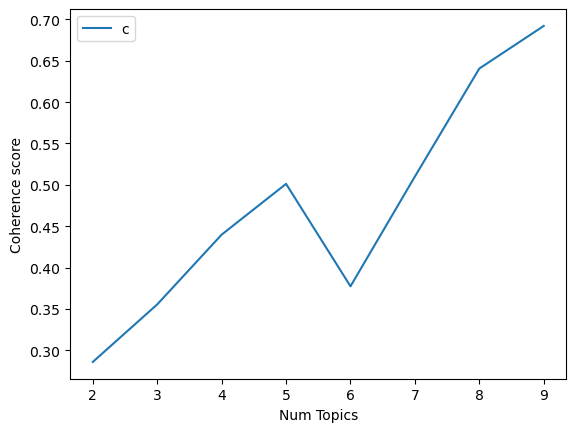

In [41]:
#Coherence scores to det. #Num topics for LDA Model

#The optimal number of topics is determined by selecting the number of topics 
#that produces the highest coherence score 
#from https://www.researchgate.net/publication/338491281_Yoga-Veganism_Correlation_Mining_of_Twitter_Health_Data

from gensim.models import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_french_sentences, start=2, limit=10, step=1)

# Plot coherence values
import matplotlib.pyplot as plt

x = range(2, 10, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend("coherence_values", loc='best')
plt.show()

In [45]:
#trying it again with 8 topics
lda_model = gensim.models.LdaModel(corpus, num_topics=8, id2word=dictionary, passes=15)

#Prints the topics discovered by the model
#This is the topic index
#num_words: specifies that the top 4 words for each topic should be printed.
for idx, topic in lda_model.print_topics(num_words=4):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.034*"article" + 0.034*"agricole" + 0.034*"abrogé" + 0.034*"orientation"
Topic 1: 0.044*"article" + 0.044*"no" + 0.044*"loi" + 0.044*"mots"
Topic 2: 0.033*"filières" + 0.033*"agricoles" + 0.033*"article" + 0.033*"performance"
Topic 3: 0.053*"article" + 0.040*"montagne" + 0.027*"mots" + 0.027*"établissement"
Topic 4: 0.044*"politique" + 0.033*"alimentation" + 0.023*"compte" + 0.023*"faveur"
Topic 5: 0.035*"phrase" + 0.019*"alinéa" + 0.019*"modifié" + 0.019*"forestière"
Topic 6: 0.037*"développement" + 0.025*"bis" + 0.025*"territoires" + 0.025*"productions"
Topic 7: 0.060*"bois" + 0.031*"équilibre" + 0.021*"article" + 0.021*"forestières"


### Step 5: Translate Topics into English

In [46]:
# Function to translate topics
def translate_topics(topics, src_language='fr', dest_language='en'):
    translator = Translator()
    translated_topics = []
    for topic in topics:
        translated_topic = translator.translate(topic, src=src_language, dest=dest_language).text
        translated_topics.append(translated_topic)
    return translated_topics

# Extract topic words from French LDA model
#initializes empty topic list
topics = []
#iterates over each topic discovered by the LDA model
for idx, topic in lda_model.print_topics(num_words=4):
    #splits the topic string into individual word components
    #topics are returned as a string with words separated by ' + '
    topic_words = topic.split(' + ')
    #The space character ' ' is used as the separator in the join method
    #Each word in topic_words is split by '*', 
    #which separates the weight and the word itself. 
    #and extracts the word part (the second element after splitting)
    #appends the cleaned and joined string to the topics 
    #.strip().strip('"'): removes any leading/trailing whitespace 
    #and any enclosing double quotes around the word.
    topics.append(' '.join(word.split('*')[1].strip().strip('"') for word in topic_words))

# Translate topics
translated_topics = translate_topics(topics)
print("Translated Topics:", translated_topics)

Translated Topics: ['Agricultural article repealed orientation', 'article no law words', 'Agricultural sectors Article Performance', 'Mountain article Words Establishment', 'Food Policy Account Account', 'Forest Modified Personal Standard', 'Development Bis Territories Productions', 'Forestry Wood Forestry']


### Step 6: Visualize the Topics

In [55]:
# Ensure pyLDAvis is using local files for CSS and JS
pyLDAvis.urls.LDAVIS_CSS_URL = './pyLDAvis_local/ldavis.v1.0.0.css'
pyLDAvis.urls.LDAVIS_JS_URL = './pyLDAvis_local/ldavis.v1.0.0.js'

In [57]:
# Visualize the topics
pyLDAvis.enable_notebook()
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.show(lda_display)

/Users/jenniferbadger/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


FileNotFoundError: [Errno 2] No such file or directory: './pyLDAvis_local/ldavis.v1.0.0.css'

In [54]:
!pip install pyLDAvis

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    